# Curso introdutório de Python 

Curso introdutório de python ofertado pelo CEDEPLAR/UFMG.

**Professores :** Marina Amorim e Marina Tomás


#### Comando para mostrar o diretório de trabalho

In [1]:
# importando pacotes necessários para análise
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# mostra o diretório de trabalho atual
# os.getcwd()  ## (Para utilizar delete o #)

'C:\\Users\\marin'

Para que o sript funcione é necessário que o diretório do notebook seja o que o contém as pastas Layout, amostras_repositorio e amostras_trabalho. Caso o diretório do código acima não seja o local onde estão os arquivos que você tem interesse em carregar você pode definir manualmente o diretório usando o comando abaixo. Para utilizar retire os ## antes do comando e adicione o caminho no local indicado.

In [2]:
# muda o diretório
#os.chdir("Insira o caminho aqui") 
#os.getcwd()

A célula abaixo tem a função de carregar o arquivo de layout(dicionário dos dados) que esta em formato excel, e extrair das abas as colunas para atribuir os valores aos objetos que facilitarão a manipulação dos dados. No final da célula é produzida uma lista de tuplas contendo as posições iniciais e finais das variáveis no microdado pois este é o formato que permitirar colocar essa informação na função read_fwf que será usada para abrir os microdados. 

In [3]:
# Carregar os arquivos com os layouts 
layout = pd.ExcelFile('layouts/Layout_microdados_Amostra.xlsx') # abre o dicionário
layout_domi = pd.read_excel(layout, 'DOMI', skiprows=1) # abre aba de domicílios e pula 1 linha
layout_pess = pd.read_excel(layout, 'PESS', skiprows=1) # abre aba de domicílios e pula 1 linha

# Cria as variáveis de layout
# Ou seja, mostrar para o software como identificar ponto inicial e final de cada variavel
variable_name_domi = layout_domi['VAR'] # nome das variáveis do dicionóario de domicílios
variable_name_pess = layout_pess['VAR'] # nome das variáveis do dicionóario de pessoas
initial_positions_domi = layout_domi['POSIÇÃO INICIAL'] # posições iniciais das variáveis de domicílios
initial_positions_pess = layout_pess['POSIÇÃO INICIAL'] # posições iniciais das variáveis de pessoas
final_positions_domi = layout_domi['POSIÇÃO FINAL'] # posições finais das variáveis de domicílios
final_positions_pess = layout_pess['POSIÇÃO FINAL'] # posições finais das variáveis das variáveis de pessoas
decimals_domi = layout_domi['DEC'].fillna(0).map(lambda x: 10**x) # divide pelas casas decimais das variáveis domicílios
decimals_pess = layout_pess['DEC'].fillna(0).map(lambda x: 10**x) # divide pelas casas decimais das variáveis pessoas
tipo_domi=layout_domi['TIPO'] # pega o tipo das variáveis de domicílios

list_of_tuples_domi = [(x-1, y) for x,y in zip(initial_positions_domi, final_positions_domi)] 
list_of_tuples_pess = [(x-1, y) for x,y in zip(initial_positions_pess, final_positions_pess)]

##### Exibir Cabeçalho do objeto layout

In [4]:
layout_domi.head() 

,VAR,NOME,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,POSIÇÃO INICIAL,POSIÇÃO FINAL,INT,DEC,TIPO
0,V0001,UNIDADE DA FEDERAÇÃO:\n11- Rondônia\n12- Acre\...,NaN,NaN,NaN,NaN,NaN,1,2,2,NaN,A
1,V0002,CÓDIGO DO MUNICÍPIO,NaN,NaN,NaN,NaN,NaN,3,7,5,NaN,A
2,V0011,ÁREA DE PONDERAÇÃO,NaN,NaN,NaN,NaN,NaN,8,20,13,NaN,A
3,V0300,CONTROLE,NaN,NaN,NaN,NaN,NaN,21,28,8,NaN,N
4,V0010,PESO AMOSTRAL,NaN,NaN,NaN,NaN,NaN,29,44,3,13.0,N


###### Definindo lista de variaveis numericas

In [5]:
domi_num =  layout_domi[layout_domi['TIPO']=='N']
domi_names_num = domi_num['VAR']
domi_names_num.head()

3     V0300
4     V0010
13    V2011
14    V2012
16    V0203
Name: VAR, dtype: object

##### Definindo lista de variáveis categóricas

In [6]:
domi_cat =  layout_domi[layout_domi['TIPO']!='N']
domi_names_cat = domi_cat['VAR']
domi_names_cat.head()

0    V0001
1    V0002
2    V0011
5    V1001
6    V1002
Name: VAR, dtype: object

##### Sequência de código para ler os arquivos de domicílios e pessoas do censo e utilizar o separador de microdados (ponto inicial e final). 

Esta celula é responsável por abrir os microdados e transforma-los em um dicionário que contém como chave o nome dos arquivos e os microdados correspondentes. Não é necessário colocar o nome de cada arquivo pois o código busca os nomes diretamente nas pastas desde que respeitada a estrutura de pastas com os nomes que sugerimos. 

No exemplo colocamos só os arquivos do Acre e Rondônia, e também só os resultados de pessoas e domílcilios. Caso queiram ler outros estados basta adicionar os arquivos do estado desejado na pasta correta que o código funcionará da mesma forma. Já se desejarem abrir os dados da pesquisa de mortalidade ou de imigrantes a sugestão é copiar o mesmo modelo usado aqui adaptando para estes arquivos

In [7]:
%%time 
# %%time calcula o tempo que o algoritmo demora para rodar

# Abre e salva em dataframe os arquivos de microdados

dict_domicilios = {}
files_to_read_domi = os.listdir('amostras_trabalho/domicilios')

dict_pessoas = {}
files_to_read_pess = os.listdir('amostras_trabalho/pessoas')

# Abre os arquivos de domicílio
for file in files_to_read_domi:
    df = pd.read_fwf('amostras_trabalho/domicilios/{}'.format(file), colspecs=list_of_tuples_domi, header=None)
    df = df.astype(float).divide(decimals_domi, axis=1)
    df.columns = variable_name_domi.values
    df = df.astype(object)
    df = df.applymap(lambda x: str(x).replace('.0', ''))
    dict_domicilios.update({'{}'.format(file): df})
    

# Abre os arquivos de pessoas
for file in files_to_read_pess:
    df = pd.read_fwf('amostras_trabalho/pessoas/{}'.format(file), colspecs=list_of_tuples_pess, header=None)
    df = df.astype(float).divide(decimals_pess, axis=1)
    df.columns = variable_name_pess.values
    df = df.applymap(lambda x: str(x).replace('.0', ''))
    df = df.astype(object)
    dict_pessoas.update({'{}'.format(file): df})

Wall time: 1min 58s


##### Concatena os dataframes de todos os estados em uma base de dados única


No nosso curso vamos trabalhar apenas com a base de dados de dois estados (AC e RO) pois, o custo computacional para trabalhar com todos os estados é grande e pode demorar um pouco para rodar as análises. O nosso intuito é aprender como manipular os dados utilizando o Python, entender a lógica do sotfware. Caso deseje adicionar mais estados é só colocar os arquivos destes estados dentro da estrutura de pastas que este script consegue ler os arquivos e concatena-los em um arquivo final.

In [8]:
domicilios = pd.concat(dict_domicilios.values(), ignore_index=True) # contatenando a base de domicilio dos dois estados
pessoas = pd.concat(dict_pessoas.values(), ignore_index=True) # contatenando a base de pessoas dos dois estados

### Comandos básicos para explorar Dataframe

In [9]:
domicilios.info() # para dar um resumo de valores não-nulos encontrados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82653 entries, 0 to 82652
Data columns (total 76 columns):
V0001    82653 non-null object
V0002    82653 non-null object
V0011    82653 non-null object
V0300    82653 non-null object
V0010    82653 non-null object
V1001    82653 non-null object
V1002    82653 non-null object
V1003    82653 non-null object
V1004    82653 non-null object
V1006    82653 non-null object
V4001    82653 non-null object
V4002    82653 non-null object
V0201    82653 non-null object
V2011    82653 non-null object
V2012    82653 non-null object
V0202    82653 non-null object
V0203    82653 non-null object
V6203    82653 non-null object
V0204    82653 non-null object
V6204    82653 non-null object
V0205    82653 non-null object
V0206    82653 non-null object
V0207    82653 non-null object
V0208    82653 non-null object
V0209    82653 non-null object
V0210    82653 non-null object
V0211    82653 non-null object
V0212    82653 non-null object
V0213    82653 non-null

In [10]:
domicilios.dtypes # tipo das variaveis de cada coluna

V0001    object
V0002    object
V0011    object
V0300    object
V0010    object
V1001    object
V1002    object
V1003    object
V1004    object
V1006    object
V4001    object
V4002    object
V0201    object
V2011    object
V2012    object
V0202    object
V0203    object
V6203    object
V0204    object
V6204    object
V0205    object
V0206    object
V0207    object
V0208    object
V0209    object
V0210    object
V0211    object
V0212    object
V0213    object
V0214    object
          ...  
V6600    object
V6210    object
M0201    object
M2011    object
M0202    object
M0203    object
M0204    object
M0205    object
M0206    object
M0207    object
M0208    object
M0209    object
M0210    object
M0211    object
M0212    object
M0213    object
M0214    object
M0215    object
M0216    object
M0217    object
M0218    object
M0219    object
M0220    object
M0221    object
M0222    object
M0301    object
M0401    object
M0402    object
M0701    object
V1005    object
Length: 76, dtype: objec

In [11]:
domicilios.head() # cabeçalho 


,V0001,V0002,V0011,V0300,V0010,V1001,V1002,V1003,V1004,V1006,...,M0218,M0219,M0220,M0221,M0222,M0301,M0401,M0402,M0701,V1005
0,12,13,1200013001001,20683,4.6799488342461,1,2,4,0,1,...,2,2,2,2,2,2,2,1,2,1
1,12,13,1200013001001,20693,4.2855582731854,1,2,4,0,1,...,2,2,2,2,2,2,2,2,2,1
2,12,13,1200013001001,44285,4.3240115130412,1,2,4,0,1,...,2,2,2,2,2,2,2,2,2,1
3,12,13,1200013001001,62701,4.903580211638,1,2,4,0,2,...,2,2,2,2,2,2,2,2,2,8
4,12,13,1200013001001,66206,5.7325157880065,1,2,4,0,2,...,2,2,2,2,2,2,2,2,2,8


Para o comando **head()** se não definir um valor de n, ele apresenta as 6 primeiras linhas de todas as colunas da base de dados. Se você definir o valor de n ele mostra a quantidade especificada.

In [12]:
pessoas.head(n=10) # cabeçalho, mostra as n (neste caso 10) primeiras observações


,V0001,V0002,V0011,V0300,V0010,V1001,V1002,V1003,V1004,V1006,...,M6693,M0670,M0671,M6800,M6121,M0604,M0605,M6462,M6472,V1005
0,12,13,1200013001001,20683,4.6799488342461,1,2,4,0,1,...,2,2,2,2,2,2,2,2,2,1
1,12,13,1200013001001,20693,4.2855582731854,1,2,4,0,1,...,2,2,2,2,2,2,2,2,2,1
2,12,13,1200013001001,20693,4.2855582731854,1,2,4,0,1,...,2,2,2,2,2,2,2,1,2,1
3,12,13,1200013001001,44285,4.3240115130412,1,2,4,0,1,...,2,2,2,2,2,2,2,2,1,1
4,12,13,1200013001001,44285,4.3240115130412,1,2,4,0,1,...,2,2,2,2,2,2,2,2,2,1
5,12,13,1200013001001,44285,4.3240115130412,1,2,4,0,1,...,2,2,2,2,2,2,2,2,2,1
6,12,13,1200013001001,44285,4.3240115130412,1,2,4,0,1,...,2,2,2,2,2,2,2,2,1,1
7,12,13,1200013001001,62701,4.903580211638,1,2,4,0,2,...,2,2,2,2,2,2,2,2,2,8
8,12,13,1200013001001,62701,4.903580211638,1,2,4,0,2,...,2,2,2,2,2,2,2,2,2,8
9,12,13,1200013001001,62701,4.903580211638,1,2,4,0,2,...,2,2,2,2,2,2,2,2,2,8


O Comando **tail()** mostra as 6 ultimas linhas da base de dados. Se você definir o valor de n ele mostra a quantidade especificada.

In [13]:
domicilios.tail() # cauda 

,V0001,V0002,V0011,V0300,V0010,V1001,V1002,V1003,V1004,V1006,...,M0218,M0219,M0220,M0221,M0222,M0301,M0401,M0402,M0701,V1005
82648,11,1807,1101807001001,6089996,5.3552610522119,1,2,4,0,1,...,2,2,2,2,2,2,2,2,2,1
82649,11,1807,1101807001001,6104644,5.2540649940441,1,2,4,0,1,...,2,2,2,2,2,2,2,2,2,1
82650,11,1807,1101807001001,6109143,5.6374657401615,1,2,4,0,2,...,2,2,2,2,2,2,2,2,2,8
82651,11,1807,1101807001001,6166408,4.7983545097696,1,2,4,0,2,...,2,2,2,2,2,2,2,2,2,8
82652,11,1807,1101807001001,6172532,3.5686173771586,1,2,4,0,1,...,2,2,2,2,2,2,2,2,2,1


Uma das formas de imprimir um ou mais resultados é utilizando o comando **print()** . O Python entende que tem que imprimir os dois valores mesmo sem o comando print.

Já o comando **shape** nos fornece a dimensão da base de dados, quantas linhas e quantas colunas.

In [14]:
print(pessoas.shape,
domicilios.shape) # dimensão da base de dados

(289282, 244) (82653, 76)


Para imprimir o nome de cada uma das colunas da base de dados basta usar o comando **columns**.

In [15]:
domicilios.columns # nome das colunas da base de dados

Index(['V0001', 'V0002', 'V0011', 'V0300', 'V0010', 'V1001', 'V1002', 'V1003',
       'V1004', 'V1006', 'V4001', 'V4002', 'V0201', 'V2011', 'V2012', 'V0202',
       'V0203', 'V6203', 'V0204', 'V6204', 'V0205', 'V0206', 'V0207', 'V0208',
       'V0209', 'V0210', 'V0211', 'V0212', 'V0213', 'V0214', 'V0215', 'V0216',
       'V0217', 'V0218', 'V0219', 'V0220', 'V0221', 'V0222', 'V0301', 'V0401',
       'V0402', 'V0701', 'V6529', 'V6530', 'V6531', 'V6532', 'V6600', 'V6210',
       'M0201', 'M2011', 'M0202', 'M0203', 'M0204', 'M0205', 'M0206', 'M0207',
       'M0208', 'M0209', 'M0210', 'M0211', 'M0212', 'M0213', 'M0214', 'M0215',
       'M0216', 'M0217', 'M0218', 'M0219', 'M0220', 'M0221', 'M0222', 'M0301',
       'M0401', 'M0402', 'M0701', 'V1005'],
      dtype='object')

In [16]:
pessoas.columns # nome das colunas da base de dados de pessoas

Index(['V0001', 'V0002', 'V0011', 'V0300', 'V0010', 'V1001', 'V1002', 'V1003',
       'V1004', 'V1006 ',
       ...
       'M6693', 'M0670', 'M0671', 'M6800', 'M6121', 'M0604', 'M0605', 'M6462',
       'M6472', 'V1005'],
      dtype='object', length=244)

## DESCRIÇÃO DAS VARIÁVEIS

Para trabalhar com as variáveis de maneira correta, devemos converter as variáveis. Desta forma, quando formos fazer alguma operação, a variável já está pronta para uso. Para converter variáveis para inteiro , string , categorico etc utilizamos os comandos a seguir. 

In [17]:
# converter variaveis para númerico e  string
domicilios[domi_names_num]= domicilios[domi_names_num].astype(float) # númerico
domicilios[domi_names_cat]= domicilios[domi_names_cat].astype(str) # string/texto
domicilios.dtypes.head()

V0001     object
V0002     object
V0011     object
V0300    float64
V0010    float64
dtype: object

O comando **describe** apresenta a sumarização de algumas informações da base de dados ou de uma coluna especifica, o resultado varia de acordo com a classe da variável (númerica ou string).

**Formato se as variáveis são numéricas:**

* count - contagem de valores
* mean e std - média e desvio padrão
* max e min- máximo e mínimo
* 50% - mediana (quartil 50%)
* 25%, 75% - quartis 

In [18]:
domicilios[domi_names_num].describe() # algumas informações sumarizadas sobre as colunas 

,V0300,V0010,V2011,V2012,V0203,V6203,V0204,V6204,V0401,V6529,V6530,V6531,V6532
count,8.265300e+04,8.265300e+04,11227.000000,11227.000000,81421.000000,81421.000000,81421.000000,81421.000000,82653.000000,81722.000000,8.172200e+04,81722.000000,8.172200e+04
mean,3.096057e+06,7.628389e+11,313.649684,340.922142,4.980288,0.852771,2.021788,1.880062,3.499958,1926.199799,2.990566e+03,666.839829,1.158640e+03
std,1.788583e+06,2.618919e+12,438.245319,2369.824594,1.930566,0.754710,0.837374,1.086109,1.805238,4846.029413,2.662047e+04,1879.538334,1.248977e+04
min,2.700000e+01,1.101244e+00,1.000000,0.107840,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.545602e+06,5.197540e+00,150.000000,0.294120,4.000000,0.500000,1.000000,1.000000,2.000000,534.000000,1.166670e+00,172.000000,3.931400e-01
50%,3.101990e+06,8.905365e+00,250.000000,0.490200,5.000000,0.700000,2.000000,1.500000,3.000000,1060.000000,2.223530e+00,375.000000,8.104600e-01
75%,4.644852e+06,1.151872e+01,350.000000,0.745100,6.000000,1.000000,3.000000,2.000000,4.000000,2040.000000,4.537250e+00,687.500000,1.673200e+00
max,6.192177e+06,3.200000e+13,36000.000000,100196.000000,25.000000,15.000000,8.000000,22.000000,25.000000,595000.000000,2.983922e+06,200000.000000,1.967843e+06


**Para variáveis categóricas e numéricas misturadas este será o modelo padrão do describe:**

* count - contagem de valores
* unique - numero de valores únicos
* Top = valor mais frequente
* Freq = frequencia do valor mais frequente

In [19]:
domicilios[domi_names_cat].describe() # sumarização de informação das colunas

,V0001,V0002,V0011,V1001,V1002,V1003,V1004,V1006,V4001,V4002,...,M0218,M0219,M0220,M0221,M0222,M0301,M0401,M0402,M0701,V1005
count,82653,82653,82653,82653,82653,82653,82653,82653,82653,82653,...,82653,82653,82653,82653,82653,82653,82653,82653,82653,82653
unique,2,74,124,1,2,8,1,2,3,13,...,2,2,1,2,2,1,1,2,2,7
top,11,205,1200401005003,1,2,4,0,1,1,11,...,2,2,2,2,2,2,2,2,2,1
freq,58314,11487,1562,82653,57681,25188,82653,56385,81421,77069,...,82650,82651,82653,82651,82651,82653,82653,73329,82651,55129


O Comando **unique()** mostra os valores únicos de uma variável.

In [20]:
domicilios["V4002"].unique() # valores unicos de uma coluna (coluna V4002)


array(['11', '51', '52', '14', '13', '62', '65', '53', '12', '63', '61',
       '64', '15'], dtype=object)

Essa sequência de comandos contar e apresentar quantos missing/NA na coluna ( dados ausentes).

Podemos contar os dados ausentes na linha utilizar o comando **domicilios.isnull().sum(axis = 1)**  

In [21]:
#(Selecionamos apenas as variáveis númericas para a lista ficar menor)
domicilios[domi_names_num].isnull().sum().sort_values(ascending=False)  
#se quiser pode trocar o num por cat e verificar que não existem dados faltando nas variáveis categóricas

V2012    71426
V2011    71426
V6204     1232
V0204     1232
V6203     1232
V0203     1232
V6532      931
V6531      931
V6530      931
V6529      931
V0401        0
V0010        0
V0300        0
dtype: int64

#### HELP - Como consultar documentação de uma função ou o Help

Existe mais de um modo de consultar o help. A primeira opção é utilizando o comando **help(nome da função)** e a segunda é **nome da função?** . 

In [22]:
help('print') # opção 1 (Mostra abaixo da célula)
# help(pd.DataFrame.describe)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [23]:
# opção 2 (Abre janela)
pd.DataFrame.describe?

#### Formar um dataframe de acordo com as colunas de interesse

A base de dados de domicílios e de pessoas contém muitas colunas, totalizando mais de 100. Para que a gente não se confunda com o uso dos dados e para que o processo fique mais rápido vamos mostrar como montar uma base de dados menor a partir de uma outra e a tratar esses dados. 

Pensei em algumas variáveis para esses exemplos. A lista de variáveis são : 

* V0001 - UF - Estado
* V1006 - SITUAÇÃO DO DOMICÍLIO
* V4001 - ESPÉCIE DE UNIDADE VISITADA
* V0201 - DOMICÍLIO, CONDIÇÃO DE OCUPAÇÃO
* V0010 - Peso Amostral
* V6529 - RENDIMENTO MENSAL DOMICILIAR EM JULHO DE 2010 
* V2011 - VALOR DO ALUGUEL (EM REAIS)      
* V0401 - QUANTAS PESSOAS MORAVAM NESTE DOMICÍLIO EM 31 DE JULHO DE 2010
* V0300 - CONTROLE

Para mais informações sobre as variáveis consultar o dicionário disponibilizados pelo IBGE.



In [24]:
# Selecionar uma parte da base de dados de domicilios
domicilio_dom = domicilios[['V0001','V1006', 'V4001','V0201','V0010','V6529','V2011','V0401','V0300']]
domicilio_dom.head()

,V0001,V1006,V4001,V0201,V0010,V6529,V2011,V0401,V0300
0,12,1,1,5,4.679949,0.0,NaN,1.0,20683.0
1,12,1,1,1,4.285558,1310.0,NaN,2.0,20693.0
2,12,1,1,1,4.324012,2000.0,NaN,4.0,44285.0
3,12,2,1,1,4.903580,50.0,NaN,4.0,62701.0
4,12,2,1,1,5.732516,4600.0,NaN,5.0,66206.0


### Tratamento dos Dados

Primeiramente vamos renomear a base de dados pois, as colunas com os códigos não são nada intuitivas.

In [25]:
#Renomear colunas (rename)
domicilio_dom = domicilio_dom.rename(columns={"V0001":'UF','V1006':'SITUAÇÃO DO DOMICÍLIO',
                             'V4001':'ESPÉCIE DE UNIDADE VISITADA',
                            'V0201': 'DOMICÍLIO, CONDIÇÃO DE OCUPAÇÃO',
                            'V0010':'PESO',
                             'V6529' : 'RENDIMENTO MENSAL DOMICILIAR',
                             'V2011' : 'VALOR DO ALUGUEL',
                              'V0401':'MORADORES',
                              'V0300':'CONTROLE'})
domicilio_dom.head()

,UF,SITUAÇÃO DO DOMICÍLIO,ESPÉCIE DE UNIDADE VISITADA,"DOMICÍLIO, CONDIÇÃO DE OCUPAÇÃO",PESO,RENDIMENTO MENSAL DOMICILIAR,VALOR DO ALUGUEL,MORADORES,CONTROLE
0,12,1,1,5,4.679949,0.0,NaN,1.0,20683.0
1,12,1,1,1,4.285558,1310.0,NaN,2.0,20693.0
2,12,1,1,1,4.324012,2000.0,NaN,4.0,44285.0
3,12,2,1,1,4.903580,50.0,NaN,4.0,62701.0
4,12,2,1,1,5.732516,4600.0,NaN,5.0,66206.0


Os microdados são organizados em códigos, se olharmos o dicionário disponibilizado pelo IBGE, vamos observar que cada código tem um nome (nome da classe). Para deixar a base de dados mais clara e simples, podemos dar nomes a esses códigos. Os comandos estão a seguir.

In [26]:
# Dar nomes as categorias de cada coluna
nomes = {'UF': {'13': 'AM', '12': 'AC',  '11': 'RO'},
        'SITUAÇÃO DO DOMICÍLIO': {'1' : 'URBANA', '2':'RURAL'},
        'ESPÉCIE DE UNIDADE VISITADA' : {'01': 'Domicílio particular permanente ocupado', 
                                        '02':'Domicílio particular permanente ocupado sem entrevista realizada',
                                        '05':' Domicílio particular improvisado ocupado',
                                        '06':'Domicílio coletivo com morador'},
         'DOMICÍLIO, CONDIÇÃO DE OCUPAÇÃO' : {'1':'Próprio de algum morador - já pago',
                                             '2':'Próprio de algum morador - ainda pagando',
                                             '3':'Alugado',
                                             '4':'Cedido por empregador',
                                             '5':'Cedido de outra forma',
                                             '6':'Outra condição'}}
domicilio_dom.replace(nomes, inplace=True)
domicilio_dom.head()

,UF,SITUAÇÃO DO DOMICÍLIO,ESPÉCIE DE UNIDADE VISITADA,"DOMICÍLIO, CONDIÇÃO DE OCUPAÇÃO",PESO,RENDIMENTO MENSAL DOMICILIAR,VALOR DO ALUGUEL,MORADORES,CONTROLE
0,AC,URBANA,1,Cedido de outra forma,4.679949,0.0,NaN,1.0,20683.0
1,AC,URBANA,1,Próprio de algum morador - já pago,4.285558,1310.0,NaN,2.0,20693.0
2,AC,URBANA,1,Próprio de algum morador - já pago,4.324012,2000.0,NaN,4.0,44285.0
3,AC,RURAL,1,Próprio de algum morador - já pago,4.903580,50.0,NaN,4.0,62701.0
4,AC,RURAL,1,Próprio de algum morador - já pago,5.732516,4600.0,NaN,5.0,66206.0


# Tabelas

## Tabelas simples

In [27]:
# Tabela simples
domicilio_dom['UF'].value_counts()

RO    58314
AC    24339
Name: UF, dtype: int64

In [28]:
#Tabela - porcentagens 
domicilio_dom['UF'].value_counts(normalize=True).sort_index()*100

AC    29.447207
RO    70.552793
Name: UF, dtype: float64

In [29]:
# Tabela simples com porcentagem de outra forma (dividindo pelo total)

domicilio_dom['UF'].value_counts()/len(domicilio_dom)*100

RO    70.552793
AC    29.447207
Name: UF, dtype: float64

## Tabela cruzada 

In [30]:
# TABELAS CRUZADAS
pd.crosstab(domicilio_dom['UF'], domicilio_dom['SITUAÇÃO DO DOMICÍLIO'], margins=True)

SITUAÇÃO DO DOMICÍLIO,RURAL,URBANA,All
UF,,,
AC,7279,17060,24339
RO,18989,39325,58314
All,26268,56385,82653


In [31]:
# TABELAS CRUZADAS COM PORCENTAGEM 
pd.crosstab(domicilio_dom['UF'], domicilio_dom['SITUAÇÃO DO DOMICÍLIO'], 
            margins=True)/len(domicilio_dom)*100

SITUAÇÃO DO DOMICÍLIO,RURAL,URBANA,All
UF,,,
AC,8.806698,20.640509,29.447207
RO,22.974363,47.578430,70.552793
All,31.781061,68.218939,100.000000


### Gráficos

Vamos apresentar alguns gráficos. Para mais explicações consulte o pdf do curso. 

Text(0.5, 1.0, 'Boxplot do número de moradores')

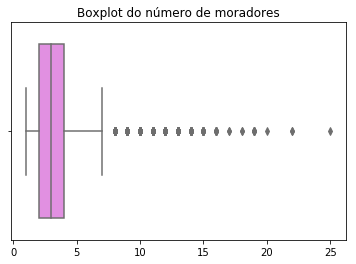

In [32]:
# Boxplot 
g1 = sns.boxplot(domicilio_dom[['MORADORES']], color='violet') ##Importante a coluna estar entre duas chaves
g1.set_title('Boxplot do número de moradores')

Text(0.5, 1.0, 'Histograma do número de moradores')

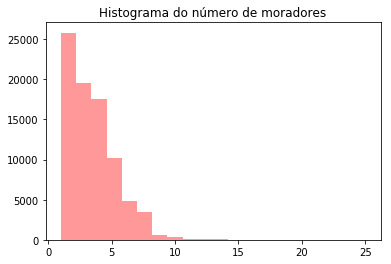

In [33]:
# Histograma- OUTRO MODELO
g2 = sns.distplot(domicilio_dom[['MORADORES']].dropna(),bins=20,kde=False, color='red')   #precisa do dropna() ou não roda4
g2.set_title('Histograma do número de moradores')

Text(0.5, 1.0, 'Histograma do número de moradores')

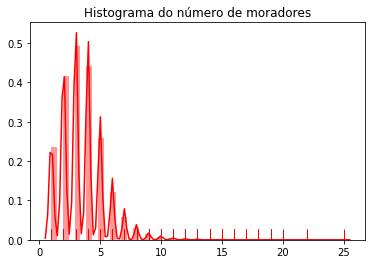

In [34]:
# Outras especificações do Histograma

g5 = sns.distplot(domicilio_dom[['MORADORES']].dropna(),hist = True,
                  kde = True, rug = True, color='red')   #precisa do dropna() ou não roda4
g5.set_title('Histograma do número de moradores')

Text(0.5, 1.0, 'Gráfico de dispersão do valor do aluguel versus Rendimento mensal do domicilio')

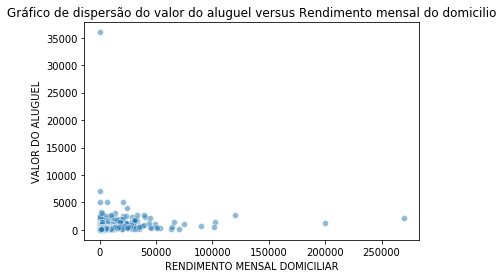

In [35]:
# Gráfico de dispersão
g3 = sns.scatterplot(y='VALOR DO ALUGUEL',x="RENDIMENTO MENSAL DOMICILIAR",data=domicilio_dom,alpha=0.5)
g3.set_title('Gráfico de dispersão do valor do aluguel versus Rendimento mensal do domicilio')

Text(0.5, 1.0, 'Gráfico de dispersão do valor do aluguel versus Rendimento mensal do domicilio')

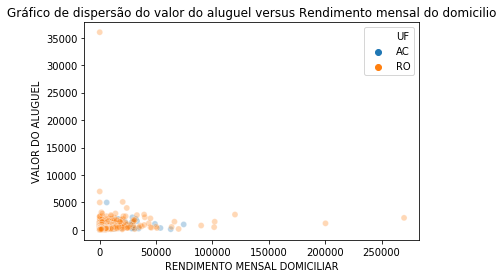

In [36]:
# Gráfico de dispersão com 3 variáveis
g6 = sns.scatterplot(y='VALOR DO ALUGUEL',x="RENDIMENTO MENSAL DOMICILIAR",
                     hue='UF', data=domicilio_dom,alpha=0.3)
g6.set_title('Gráfico de dispersão do valor do aluguel versus Rendimento mensal do domicilio')

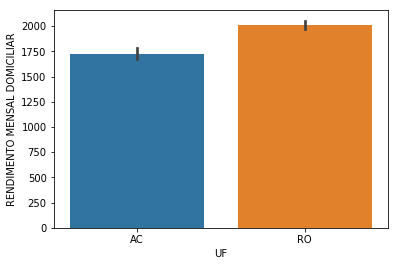

In [37]:
# Gráfico de barras
# Rendimento mensal por Estado
sns.barplot(y='RENDIMENTO MENSAL DOMICILIAR',
            x='UF', data = domicilio_dom)
plt.show()

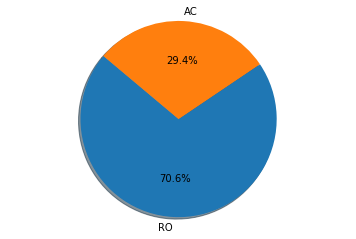

In [38]:
pie_values = domicilio_dom['UF'].value_counts().rename_axis('estado').reset_index(name="valor")
plt.pie(pie_values["valor"],labels = pie_values["estado"],autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


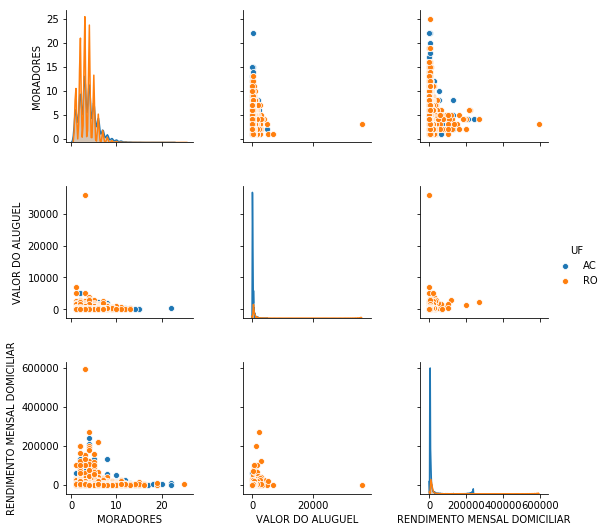

In [39]:
# Gráficos agrupados (histograma e dispersão)
plt.close()
sns.pairplot(data=domicilio_dom,vars =["MORADORES", 'VALOR DO ALUGUEL',"RENDIMENTO MENSAL DOMICILIAR"]
             , hue = "UF")
plt.show()

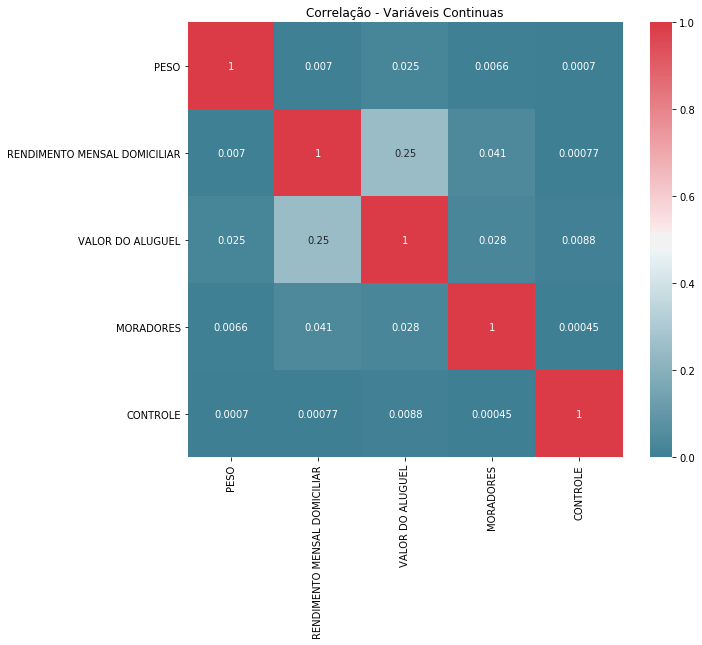

In [43]:
# Gráfico de correlação 
# Correlação para variáveis continuas
f, ax = plt.subplots(figsize=(10, 8))
corr = domicilio_dom.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
ax.set_title('Correlação - Variáveis Continuas')
plt.show()

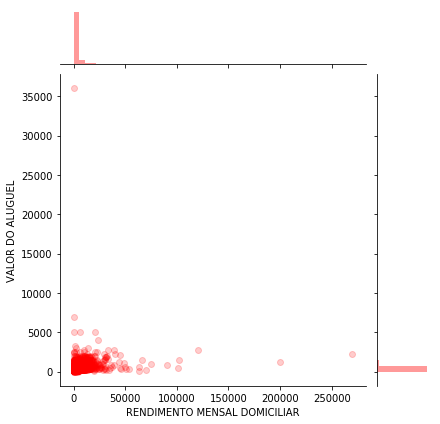

In [44]:
# Exemplos de gráficos 2 em 1
sns.jointplot(y='VALOR DO ALUGUEL',x="RENDIMENTO MENSAL DOMICILIAR",data=domicilio_dom,alpha=0.2,
             color='red')
plt.show()
plt.show()

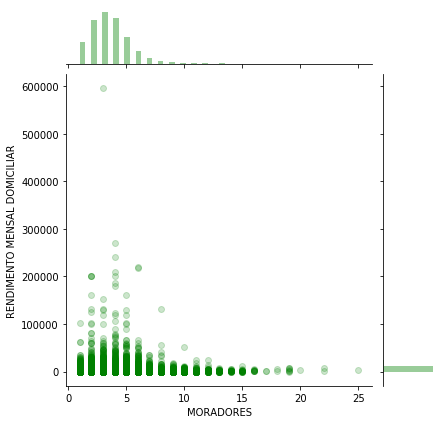

In [45]:
# Outro Exemplo de gráfico 2 em 1
sns.jointplot(y="RENDIMENTO MENSAL DOMICILIAR",x="MORADORES",data=domicilio_dom,alpha=0.2,
             color='green')
plt.show()

## COMBINAR BANCOS DE DADOS

O IBGE solta os dados para Domícilios e de Pessoas de forma separada mas, se quisermos conseguimos unir as informações dos dois universos.

As duas bases tem uma variável em comum, a coluna "Controle", com ela conseguimos unir as bases de dados. Vamos agora ver os comandos que nos permite fazer isso. 

### Adicionar informações de domicílios na tabela de pessoas

Primeiro vamos filtrar as variáveis da base de dados de pessoas que vamos usar na nova base de dados. Assim economizamos tempo e não nos confundir com outras variaveis, o tempo de processamento dos dados diminui. 

Lembrando que se você desejar você pode usar a base de dados completa e lembrando também que já criamos uma base de dados com algumas variáveis da base de domicílios. 

A variável V0504 é muito importante pois é a variável de Ordem da pessoa, que corresponde a um número de ordem sequencial para cada morador. Sem essa variável o banco perde a identificação de cada indivíduo. Da mesma forma é a variável de controle V0300 que corresponde ao código do domícilio. 

In [42]:
pessoas_sel = pessoas[['V0300','V0606','V0504']]
pessoas_sel = pessoas_sel.rename(columns={'V0300':'CONTROLE','V0606':'COR','V0504': 'ORDEM DA PESSOA'})
pessoas_sel.head()

,CONTROLE,COR,ORDEM DA PESSOA
0,20683,4,1
1,20693,4,2
2,20693,4,1
3,44285,4,1
4,44285,1,4


In [43]:
domicilio_dom.info() # informações sobre a base
## Conferir nomes e tipos das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82653 entries, 0 to 82652
Data columns (total 9 columns):
UF                                 82653 non-null object
SITUAÇÃO DO DOMICÍLIO              82653 non-null object
ESPÉCIE DE UNIDADE VISITADA        82653 non-null object
DOMICÍLIO, CONDIÇÃO DE OCUPAÇÃO    82653 non-null object
PESO                               82653 non-null float64
RENDIMENTO MENSAL DOMICILIAR       81722 non-null float64
VALOR DO ALUGUEL                   11227 non-null float64
MORADORES                          82653 non-null float64
CONTROLE                           82653 non-null float64
dtypes: float64(5), object(4)
memory usage: 5.7+ MB


Para que a gente consiga unir a base de dados de pessoas e domicilios precisamos ter uma coluna em comum entre os dois dados essa coluna se chama controle e usaremos ela para unir as duas bases.

In [44]:
## KEY PRECISA SER DO MESMO TIPO NOS DOIS DATAFRAMES
pessoas_sel['CONTROLE']=pessoas_sel['CONTROLE'].astype(float)
pessoas_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289282 entries, 0 to 289281
Data columns (total 3 columns):
CONTROLE           289282 non-null float64
COR                289282 non-null object
ORDEM DA PESSOA    289282 non-null object
dtypes: float64(1), object(2)
memory usage: 6.6+ MB


Adicionar informações de domícilios no banco de pessoas que selecionamos acima.  Este comando vai unir os dados do domicílio com a seleção de pessoas que nós fizemos, ou seja, juntar a base de dados **domicilio_dom** e **pessoas_sel** de acordo com a variavel controle.

In [49]:
censo_joined = pd.merge(domicilio_dom,pessoas_sel,on='CONTROLE',how="left")
censo_joined.head()

,UF,SITUAÇÃO DO DOMICÍLIO,ESPÉCIE DE UNIDADE VISITADA,"DOMICÍLIO, CONDIÇÃO DE OCUPAÇÃO",PESO,RENDIMENTO MENSAL DOMICILIAR,VALOR DO ALUGUEL,MORADORES,CONTROLE,COR,ORDEM DA PESSOA
0,AC,URBANA,1,Cedido de outra forma,4.679949,0.0,NaN,1.0,20683.0,4,1
1,AC,URBANA,1,Próprio de algum morador - já pago,4.285558,1310.0,NaN,2.0,20693.0,4,2
2,AC,URBANA,1,Próprio de algum morador - já pago,4.285558,1310.0,NaN,2.0,20693.0,4,1
3,AC,URBANA,1,Próprio de algum morador - já pago,4.324012,2000.0,NaN,4.0,44285.0,4,1
4,AC,URBANA,1,Próprio de algum morador - já pago,4.324012,2000.0,NaN,4.0,44285.0,1,4


### Agregar informações de pessoas por domícilio

Agora que unimos a base de dados de domicílios e de pessoas conseguimos fazer algumas análises mais elaboradas usando as informações das duas bases.

**Exemplo :** agora podemos agrupar o numero de pessoas do domicílio por cor. 

##### Dummies

Vamos mostrar agora como criar variáveis dummies no Python, isso é bem útil quando estamos trabalhando com variáveis categoricas. 

No dicionário do IBGE, a variável cor tem várias classificações. 
1- Branca
2- Preta
3- Amarela
4- Parda
5- Indígena
9- Ignorado

Vamos criar uma dummie para cada uma dessas classes. 

In [56]:
##Criar dummies
pessoas_cor = pd.get_dummies(pessoas_sel,columns=['COR'])
pessoas_cor.head()


,CONTROLE,ORDEM DA PESSOA,COR_1,COR_2,COR_3,COR_4,COR_5,COR_9
0,20683.0,1,0,0,0,1,0,0
1,20693.0,2,0,0,0,1,0,0
2,20693.0,1,0,0,0,1,0,0
3,44285.0,1,0,0,0,1,0,0
4,44285.0,4,1,0,0,0,0,0


Agora vamos juntar essas novas colunas criadas na nossa base de dados usando o agregador soma. É importante notar que esse agregador somará todas as linhas que não estão no controle, logo se queremos somar as dummies mas não somar o número de moradores da casa de cada pessoas devemos colocar o número de moradores dentro do groupby. Deixamos as outras variáveis que não utilizaremos fora do groupby para que fique claro com o que acontece se elas são deixadas fora do parentesis do agregador (mesmo se tranatndo de informações que repetem de forma igual para cada valor do controle).

In [64]:
censo_joined2 = domicilio_dom.merge(pessoas_cor,on='CONTROLE', how="left")
censo_joined2.head()

,UF,SITUAÇÃO DO DOMICÍLIO,ESPÉCIE DE UNIDADE VISITADA,"DOMICÍLIO, CONDIÇÃO DE OCUPAÇÃO",PESO,RENDIMENTO MENSAL DOMICILIAR,VALOR DO ALUGUEL,MORADORES,CONTROLE,ORDEM DA PESSOA,COR_1,COR_2,COR_3,COR_4,COR_5,COR_9
0,AC,URBANA,1,Cedido de outra forma,4.679949,0.0,NaN,1.0,20683.0,1,0,0,0,1,0,0
1,AC,URBANA,1,Próprio de algum morador - já pago,4.285558,1310.0,NaN,2.0,20693.0,2,0,0,0,1,0,0
2,AC,URBANA,1,Próprio de algum morador - já pago,4.285558,1310.0,NaN,2.0,20693.0,1,0,0,0,1,0,0
3,AC,URBANA,1,Próprio de algum morador - já pago,4.324012,2000.0,NaN,4.0,44285.0,1,0,0,0,1,0,0
4,AC,URBANA,1,Próprio de algum morador - já pago,4.324012,2000.0,NaN,4.0,44285.0,4,1,0,0,0,0,0


In [67]:
# juntando as dummies na nossa base de dados
censo_cor=censo_joined2.groupby(['CONTROLE','MORADORES']).aggregate(sum).reset_index()
censo_cor.head()

,CONTROLE,MORADORES,PESO,RENDIMENTO MENSAL DOMICILIAR,VALOR DO ALUGUEL,COR_1,COR_2,COR_3,COR_4,COR_5,COR_9
0,27.0,4.0,1.409209e+01,8640.0,0.0,1,0,0,3,0,0
1,52.0,4.0,1.948539e+01,1648.0,0.0,0,0,0,4,0,0
2,102.0,2.0,6.272273e+00,1020.0,0.0,1,0,0,1,0,0
3,218.0,1.0,1.057689e+01,510.0,120.0,1,0,0,0,0,0
4,388.0,2.0,1.298031e+13,2040.0,0.0,1,1,0,0,0,0


##### Criando uma nova coluna
Criando uma coluna com o nome: Porcentagem de negros. Essa variavel vai ser a quantidade de pessoas negras dividido pelo 
número de moradores.


In [68]:
# Criando uma coluna com o nome: Porcentagem de negros
censo_cor['PORCENTAGEM DE NEGROS']=(censo_cor['COR_2']/censo_cor['MORADORES'])*100
censo_cor.head()

,CONTROLE,MORADORES,PESO,RENDIMENTO MENSAL DOMICILIAR,VALOR DO ALUGUEL,COR_1,COR_2,COR_3,COR_4,COR_5,COR_9,PORCENTAGEM DE NEGROS
0,27.0,4.0,1.409209e+01,8640.0,0.0,1,0,0,3,0,0,0.0
1,52.0,4.0,1.948539e+01,1648.0,0.0,0,0,0,4,0,0,0.0
2,102.0,2.0,6.272273e+00,1020.0,0.0,1,0,0,1,0,0,0.0
3,218.0,1.0,1.057689e+01,510.0,120.0,1,0,0,0,0,0,0.0
4,388.0,2.0,1.298031e+13,2040.0,0.0,1,1,0,0,0,0,50.0


In [72]:
# mostra a frequência para cada porcentagem de negros no domicilio.
cor_freq= censo_cor['PORCENTAGEM DE NEGROS'].value_counts()
cor_freq.head(15)

0.000000      71664
100.000000     2454
50.000000      1991
33.333333      1730
25.000000      1383
20.000000       841
66.666667       539
16.666667       425
40.000000       295
75.000000       264
14.285714       190
60.000000       149
12.500000       119
80.000000       119
28.571429        81
Name: PORCENTAGEM DE NEGROS, dtype: int64

##### Criando categorias dentro de uma coluna

Para que uma variável fique interpretável, as vezes é necessário agrupar os resultados. Apresentamos um modo de fazer isso. 

In [73]:
# Valores encontrados para a cor 1  (sem agregar em categorias)
censo_cor['COR_1'].value_counts()

0     40214
1     18013
2     11347
3      6827
4      3897
5      1556
6       470
7       175
8        83
9        44
10       13
11        6
12        5
14        2
13        1
Name: COR_1, dtype: int64

In [74]:
#Criar uma classificação das porcentagens em faixas para facilitar interpretação
censo_cor.loc[censo_cor['PORCENTAGEM DE NEGROS']<25,'cor_cat'] = 'a- <25%'
censo_cor.loc[(censo_cor['PORCENTAGEM DE NEGROS']>=25) & ( censo_cor['PORCENTAGEM DE NEGROS']<50) ,'cor_cat'] = 'b - 25%-50%'
censo_cor.loc[(censo_cor['PORCENTAGEM DE NEGROS']>=50 ) & ( censo_cor['PORCENTAGEM DE NEGROS']<75),'cor_cat'] = 'c- 50%-75%'
censo_cor.loc[censo_cor['PORCENTAGEM DE NEGROS']>=75,'cor_cat'] = 'd- >75%'
censo_cor.head()

,CONTROLE,MORADORES,PESO,RENDIMENTO MENSAL DOMICILIAR,VALOR DO ALUGUEL,COR_1,COR_2,COR_3,COR_4,COR_5,COR_9,PORCENTAGEM DE NEGROS,cor_cat
0,27.0,4.0,1.409209e+01,8640.0,0.0,1,0,0,3,0,0,0.0,a- <25%
1,52.0,4.0,1.948539e+01,1648.0,0.0,0,0,0,4,0,0,0.0,a- <25%
2,102.0,2.0,6.272273e+00,1020.0,0.0,1,0,0,1,0,0,0.0,a- <25%
3,218.0,1.0,1.057689e+01,510.0,120.0,1,0,0,0,0,0,0.0,a- <25%
4,388.0,2.0,1.298031e+13,2040.0,0.0,1,1,0,0,0,0,50.0,c- 50%-75%


In [75]:
##  mostra a frequência para cada porcentagem de negros no domicilio. - EM 4 CATEGORIAS
cor_freq= censo_cor['cor_cat'].value_counts().rename_axis('Porcentagem de negros').reset_index(name="Freq")
cor_freq.head(10).sort_values(by='Porcentagem de negros')

,Porcentagem de negros,Freq
0,a- <25%,73390
1,b - 25%-50%,3579
3,c- 50%-75%,2755
2,d- >75%,2929


In [76]:
# Tabela cruzada que cruza a situação do domicilio com a Cor
pd.crosstab( domicilio_dom['SITUAÇÃO DO DOMICÍLIO'],censo_cor['cor_cat'], 
            margins=True)/len(domicilio_dom)*100

cor_cat,a- <25%,b - 25%-50%,c- 50%-75%,d- >75%,All
SITUAÇÃO DO DOMICÍLIO,,,,,
RURAL,28.230070,1.378050,1.056223,1.116717,31.781061
URBANA,60.562835,2.952101,2.276989,2.427014,68.218939
All,88.792905,4.330151,3.333212,3.543731,100.000000


## Teste de diferença de médias
Podemos fazer um teste para a diferença de média de moradores entre os estados de AC e RO

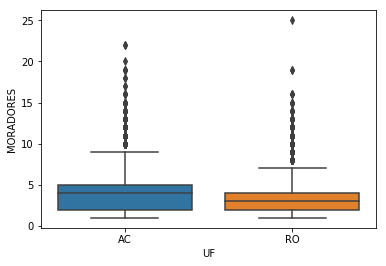

In [58]:
# Gráfico de barras
# Rendimento mensal por Estado
sns.boxplot(y='MORADORES',
            x='UF', data = domicilio_dom)

In [59]:
from scipy import stats
AC = domicilio_dom[domicilio_dom['UF']=='AC']
RO = domicilio_dom[domicilio_dom['UF']=='RO']
stats.ttest_ind(AC['MORADORES'],RO['MORADORES'])

Ttest_indResult(statistic=36.16999283206143, pvalue=3.0530418558316513e-284)

**Teste T**

**H0:** Este é um teste bilateral para a hipótese nula de que 2 amostras independentes têm valores médios (esperados) idênticos.

**H1:** As 2 amostras independentes têm valores médios (esperados) diferentes.

P Valor menor que 0.05, então, com 5% de significância rejeitamos a hipótese nula, ou seja, os estados (AC e RO) tem médias de moradores iguais. Ou, não temos evidências estatísticas para dizer que a média de moradores é diferente entre os dois estados. 